# Cabecera

**Nombre completo del estudiante**: Valencia Hernandez Kevin Guadalupe
**Grupo**: 5BV1
**Carrera**: Ingenieria en Inteligencia Artificial
**Fecha de última modificación**: 12/05/25

---

## Descripción detallada del programa

Este programa implementa diferentes algoritmos para identificar similitudes entre palabras, frases y documentos, utilizando tanto enfoques semánticos como sintácticos. Se analizan cinco documentos de Project Gutenberg mediante varias técnicas:

1. **Similitud de palabras con synsets**: Uso de las métricas de WordNet "wup_similarity" y "path_similarity" para encontrar términos similares.
2. **Similitud de documentos con synsets**: Comparación de frases representativas mediante "path_similarity".
3. **Similitud de palabras con embedding**: Utilización del modelo pre-entrenado GloVe para identificar términos similares mediante similitud de coseno.
4. **Similitud de documentos con embedding**: Aplicación del modelo BERT para encontrar similitud entre documentos.

### Datos de entrada:
- **Textos de entrada**: Cinco introducciones de libros de Project Gutenberg de temáticas similares.
- **Modelos pre-entrenados**: GloVe y BERT para análisis de similitud.

---

## PRÁCTICA 4: IDENTIFICACIÓN DE PALABRAS, FRASES, Y DOCUMENTOS SIMILARES

In [67]:
# Importaciones generales
import nltk
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
from collections import Counter
from urllib.request import urlopen
from bs4 import BeautifulSoup

# Importaciones NLTK para procesamiento básico
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

# Importaciones para similitud con synsets
from nltk.corpus import wordnet as wn

# Importaciones para GloVe
import gensim.downloader

# Importaciones para BERT
from transformers import BertModel, BertTokenizer
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Descarga de recursos NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Configuración de visualización
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None)

# Semilla para reproducibilidad
np.random.seed(42)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## 1. Generación de cuerpo de documentos

En esta sección, identificamos y descargamos cinco libros de interés desde Project Gutenberg. Seleccionamos obras de ciencia ficción clásica para mantener una temática similar. De cada libro, extraemos específicamente la introducción para formar nuestro corpus de análisis.

In [70]:
import requests

def obtenerIntroduccionLibro1():
    url = "https://www.gutenberg.org/cache/epub/43713/pg43713.txt"
    response = requests.get(url)
    texto = response.text
    
    marcadorInicio = "INTRODUCTORY."
    marcadorFin = "PART I."
    
    indiceInicio = texto.find(marcadorInicio)
    if indiceInicio == -1:
        return "No se encontró la introducción"
    
    indiceInicio += len(marcadorInicio)
    indiceFin = texto.find(marcadorFin, indiceInicio)
    
    if indiceFin == -1:
        return "No se encontró el fin de la introducción"
    
    return texto[indiceInicio:indiceFin].strip()

In [71]:
intro1 = obtenerIntroduccionLibro1()
print(intro1)

Butterflies belong to the great Order of insects called Lepidoptera
(Greek _lepis_, a scale, and _pteron_, a wing), that is, insects whose
wings are covered with minute structures termed scales. Moths
(Heterocera) also belong to the same order, and the first point to deal
with is how may butterflies be distinguished from moths? In a broad kind
of way they may be recognized by their horns (_antennæ_), which are
slender as regards the shaft, but are gradually or abruptly clubbed at
the extremity. For this reason they were designated Rhopalocera, or
"club horned," the Heterocera being supposed to have horns of various
kinds other than clubbed. As a matter of fact this method of separating
moths and butterflies does not hold good in dealing with the Lepidoptera
of the world, and it is from a study of these, as a whole, that
systematists have arrived at the conclusion that there is no actual line
of division between moths and butterflies. In modern classification,
then, butterflies are redu

In [72]:
def obtenerIntroduccionLibro2():
    url = "https://www.gutenberg.org/cache/epub/49211/pg49211.txt"
    response = requests.get(url)
    texto = response.text
    
    marcadorInicio = "INTRODUCTORY CHAPTER"
    marcadorFin = "CHAPTER I"
    
    indiceInicio = texto.find(marcadorInicio)
    if indiceInicio == -1:
        return "No se encontró la introducción"
    
    indiceInicio += len(marcadorInicio)
    indiceFin = texto.find(marcadorFin, indiceInicio)
    
    if indiceFin == -1:
        return "No se encontró el fin de la introducción"
    
    return texto[indiceInicio:indiceFin].strip()

In [73]:
intro2 = obtenerIntroduccionLibro2()
print(intro2)

PLANTS AND OUR DAILY NEEDS


Perhaps few of us realize that without plants all our modern
civilization would be swept away and that upon plants has been built all
that we have so far accomplished and everything that we may yet become.
The overthrow of any king or republic, the wiping out of all money and
finance or any of the manifold evidences of our modern world could not
for a moment be compared to what would happen to us with the sudden
destruction of plant life from the earth.

Food and drink, the very houses we live in and heat, medicines and
drugs, books and pictures, musical instruments and tires for
automobiles, all these and hundreds of our daily needs depend upon the
fact that plants of many different kinds grow upon the earth and in
sufficient amounts to be of importance. It is easy to say in opposition
to this that we get much food from animals, that we can drink water, and
that neither of these comes from plants. But water would soon be lost to
us if forests did not conse

In [74]:
import re

def obtenerIntroduccionLibro3():
    url = "https://www.gutenberg.org/cache/epub/16410/pg16410.txt"
    response = requests.get(url)
    texto = response.text
    
    # Usar regex con grupos de captura para obtener el texto entre INTRODUCTION y CHAPTER II
    # El primer grupo captura "CHAPTER I\n\nINTRODUCTION"
    # El segundo grupo captura todo el contenido hasta antes de "CHAPTER II"
    patron = r"(CHAPTER I\s*\n\s*\n\s*INTRODUCTION\s*\n\s*\n)([\s\S]*?)(?=\s*CHAPTER II)"
    
    coincidencia = re.search(patron, texto)
    
    if coincidencia:
        # Devolver solo el segundo grupo, que contiene el texto de la introducción
        return coincidencia.group(2).strip()
    else:
        return "No se encontró la introducción"

In [75]:
intro3 = obtenerIntroduccionLibro3()
print(intro3)

Among the manifold operations of living creatures few have more strongly
impressed the casual observer or more deeply interested the thoughtful
student than the transformations of insects. The schoolboy watches the
tiny green caterpillars hatched from eggs laid on a cabbage leaf by the
common white butterfly, or maybe rears successfully a batch of silkworms
through the changes and chances of their lives, while the naturalist
questions yet again the 'how' and 'why' of these common though wondrous
life-stories, as he seeks to trace their course more fully than his
predecessors knew.

[Illustration: Fig. 1. _a_, Diamond-back Moth (_Plutella
cruciferarum_); _b_, young caterpillar, dorsal view; _c_, full-grown
caterpillar, dorsal view; _d_, side view; _e_, pupa, ventral view.
Magnified 6 times. From _Journ. Dept. Agric. Ireland_, vol. I.]

Everyone is familiar with the main facts of such a life-story as that of
a moth or butterfly. The form of the adult insect (fig. 1 _a_) is
dominated by t

In [76]:
def obtenerIntroduccionLibro4():
    url = "https://www.gutenberg.org/cache/epub/48010/pg48010.txt"
    response = requests.get(url)
    texto = response.text
    
    # Buscar la cadena "INTRODUCTION" seguida por cualquier cosa hasta "CHAPTER I"
    primera_intro = texto.find("INTRODUCTION")
    if primera_intro == -1:
        return "No se encontró INTRODUCTION"
    
    # Buscar la segunda aparición de "INTRODUCTION"
    segunda_intro = texto.find("INTRODUCTION", primera_intro + 1)
    if segunda_intro == -1:
        return "No se encontró la segunda ocurrencia de INTRODUCTION"
    
    # Avanzar después de la palabra "INTRODUCTION"
    inicio_contenido = segunda_intro + len("INTRODUCTION")
    
    # Buscar CHAPTER I 
    fin_pos = texto.find("CHAPTER I", inicio_contenido)
    if fin_pos == -1:
        return "No se encontró CHAPTER I después de la segunda INTRODUCTION"
    
    # Extraer el texto entre inicio_contenido y fin_pos
    introduccion_texto = texto[inicio_contenido:fin_pos].strip()
    
    return introduccion_texto

In [77]:
intro4 = obtenerIntroduccionLibro4()
print(intro4)

.                                  xiii

     "The edifice of the world is only sustained by the impulses
     of hunger and love."--SCHILLER.


In that great drama which we call Nature, each animal plays its
especial part, and He who has adjusted and regulated everything in its
due order and proportion, watches with as much care over the
preservation of the most repulsive insect, as over the young brood of
the most brilliant bird. Each, as it comes into the world, thoroughly
knows its part, and plays it the better because it is more free to
obey the dictates of its instinct. There presides over this great
drama of life a law as harmonious as that which regulates the
movements of the heavenly bodies; and if death carries off from the
scene every hour myriads of living creatures, each hour life causes
new legions to rise up in order to replace them. It is a whirlwind of
being, a chain without end.

This is now more fully known; whatever the animal may be, whether that
which occupies the

In [78]:
def obtenerIntroduccionLibro5():
    url = "https://www.gutenberg.org/cache/epub/26163/pg26163.txt"
    response = requests.get(url)
    texto = response.text
    
    # Buscar la primera ocurrencia de "INTRODUCTION"
    primera_intro = texto.find("INTRODUCTION")
    if primera_intro == -1:
        return "No se encontró INTRODUCTION"
    
    # Buscar la segunda aparición de "INTRODUCTION"
    segunda_intro = texto.find("INTRODUCTION", primera_intro + 1)
    if segunda_intro == -1:
        return "No se encontró la segunda ocurrencia de INTRODUCTION"
    
    # Avanzar después de la palabra "INTRODUCTION"
    inicio_contenido = segunda_intro + len("INTRODUCTION")
    
    # Buscar CHAPTER I
    fin_pos = texto.find("CHAPTER I", inicio_contenido)
    if fin_pos == -1:
        return "No se encontró CHAPTER I después de la segunda INTRODUCTION"
    
    # Extraer el texto entre inicio_contenido y fin_pos
    introduccion_texto = texto[inicio_contenido:fin_pos].strip()
    
    return introduccion_texto

In [79]:
intro5 = obtenerIntroduccionLibro5()
print(intro5)

The history of the evolution of life, incomplete as it yet is, already
reveals to us how the intellect has been formed, by an uninterrupted
progress, along a line which ascends through the vertebrate series up to
man. It shows us in the faculty of understanding an appendage of the
faculty of acting, a more and more precise, more and more complex and
supple adaptation of the consciousness of living beings to the
conditions of existence that are made for them. Hence should result this
consequence that our intellect, in the narrow sense of the word, is
intended to secure the perfect fitting of our body to its environment,
to represent the relations of external things among themselves--in
short, to think matter. Such will indeed be one of the conclusions of
the present essay. We shall see that the human intellect feels at home
among inanimate objects, more especially among solids, where our action
finds its fulcrum and our industry its tools; that our concepts have
been formed on the model

In [80]:
cuerpo = [intro1, intro2, intro3, intro4, intro5]

## 2. Normalización de documentos

En esta sección, realizamos la normalización y el preprocesamiento de cada documento del corpus. El proceso incluye:

1. Segmentación en oraciones
2. Tokenización de palabras
3. Etiquetado gramatical (POS tagging)
4. Aplicación de técnicas específicas de normalización

Estas técnicas de normalización se adaptan según los objetivos de cada análisis:
- Para similitud de palabras con synsets, necesitamos mantener la estructura de las oraciones y categorizar por POS
- Para similitud con embeddings, necesitamos eliminar stopwords y realizar lematización

In [81]:
import spacy
import re
from nltk.tokenize import sent_tokenize
import string

# Cargar el modelo de spaCy
nlp = spacy.load("en_core_web_sm")

def normalizarDocumento(texto, tipo_normalizacion="general"):
    """
    Normaliza un documento segmentándolo en oraciones y tokenizándolo con etiquetas gramaticales,
    usando spaCy para el procesamiento.
    
    Args:
        texto (str): Texto a normalizar
        tipo_normalizacion (str): Tipo de normalización a aplicar ('general', 'synsets', 'embeddings')
        
    Returns:
        dict: Diccionario con el texto normalizado según diferentes niveles
    """
    resultado = {
        "oraciones_originales": [],
        "oraciones_tokenizadas": [],
        "oraciones_etiquetadas": [],
        "oraciones_normalizadas": []
    }
    
    # Limpieza previa del texto completo
    # Reemplazar saltos de línea y otros caracteres especiales con espacios
    texto = re.sub(r'[\r\n\t]+', ' ', texto)
    # Reemplazar múltiples espacios con uno solo
    texto = re.sub(r'\s+', ' ', texto).strip()
    
    # 1. Segmentación en oraciones (usando NLTK para mantener compatibilidad)
    oraciones = sent_tokenize(texto)
    resultado["oraciones_originales"] = oraciones
    
    for oracion in oraciones:
        # Limpieza adicional de la oración
        oracion = oracion.strip()
        
        # Procesar con spaCy
        doc = nlp(oracion)
        
        # 2. Tokenización (sin puntuación ni números)
        tokens = [token.text for token in doc 
                 if not token.is_punct and not token.like_num]
        resultado["oraciones_tokenizadas"].append(tokens)
        
        # 3. Etiquetado gramatical
        tokens_etiquetados = [(token.text, token.pos_) for token in doc 
                             if not token.is_punct and not token.like_num]
        resultado["oraciones_etiquetadas"].append(tokens_etiquetados)
        
        # 4. Normalización específica según el tipo
        if tipo_normalizacion == "synsets":
            # Para synsets: eliminar stopwords pero mantener la forma original
            tokens_normalizados = [token.text for token in doc 
                                  if not token.is_punct and not token.like_num 
                                  and not token.is_stop]
            
        elif tipo_normalizacion == "embeddings":
            # Para embeddings: eliminar stopwords y lematizar
            tokens_normalizados = [token.lemma_ for token in doc 
                                  if not token.is_punct and not token.like_num 
                                  and not token.is_stop]
        else:  # general
            # Normalización general: eliminar stopwords
            tokens_normalizados = [token.text for token in doc 
                                  if not token.is_punct and not token.like_num 
                                  and not token.is_stop]
        
        resultado["oraciones_normalizadas"].append(tokens_normalizados)
    
    return resultado

In [82]:
# Normalización de la introducción 1
print("Normalizando introducción 1...")
intro1_normalizada = normalizarDocumento(intro1)

# Mostrar estadísticas
print(f"Oraciones originales: {len(intro1_normalizada['oraciones_originales'])}")
print(f"Tokens totales: {sum(len(tokens) for tokens in intro1_normalizada['oraciones_tokenizadas'])}")
print(f"Tokens después de normalización: {sum(len(tokens) for tokens in intro1_normalizada['oraciones_normalizadas'])}")

# Mostrar ejemplo de normalización completa para la primera oración
print("\nEjemplo completo con la primera oración:")
if intro1_normalizada['oraciones_originales']:
    primera_oracion = intro1_normalizada['oraciones_originales'][0]
    print(f"\nOriginal: {primera_oracion}")
    
    print("\nTokenizada:")
    print(intro1_normalizada['oraciones_tokenizadas'][0])
    
    print("\nEtiquetada gramaticalmente:")
    print(intro1_normalizada['oraciones_etiquetadas'][0])
    
    print("\nNormalizada (sin stopwords):")
    print(intro1_normalizada['oraciones_normalizadas'][0])

Normalizando introducción 1...
Oraciones originales: 41
Tokens totales: 1137
Tokens después de normalización: 492

Ejemplo completo con la primera oración:

Original: Butterflies belong to the great Order of insects called Lepidoptera (Greek _lepis_, a scale, and _pteron_, a wing), that is, insects whose wings are covered with minute structures termed scales.

Tokenizada:
['Butterflies', 'belong', 'to', 'the', 'great', 'Order', 'of', 'insects', 'called', 'Lepidoptera', 'Greek', 'lepis', 'a', 'scale', 'and', 'pteron', 'a', 'wing', 'that', 'is', 'insects', 'whose', 'wings', 'are', 'covered', 'with', 'minute', 'structures', 'termed', 'scales']

Etiquetada gramaticalmente:
[('Butterflies', 'NOUN'), ('belong', 'VERB'), ('to', 'ADP'), ('the', 'DET'), ('great', 'ADJ'), ('Order', 'NOUN'), ('of', 'ADP'), ('insects', 'NOUN'), ('called', 'VERB'), ('Lepidoptera', 'PROPN'), ('Greek', 'ADJ'), ('lepis', 'NOUN'), ('a', 'DET'), ('scale', 'NOUN'), ('and', 'CCONJ'), ('pteron', 'NOUN'), ('a', 'DET'), ('wi

In [83]:
# Normalización de la introducción 1
print("Normalizando introducción 1...")
intro1_normalizada = normalizarDocumento(intro1)

# Mostrar estadísticas
print(f"Oraciones originales: {len(intro1_normalizada['oraciones_originales'])}")
print(f"Tokens totales: {sum(len(tokens) for tokens in intro1_normalizada['oraciones_tokenizadas'])}")
print(f"Tokens después de normalización: {sum(len(tokens) for tokens in intro1_normalizada['oraciones_normalizadas'])}")

# Mostrar ejemplo de normalización completa para la primera oración
print("\nEjemplo completo con la primera oración:")
if intro1_normalizada['oraciones_originales']:
    primera_oracion = intro1_normalizada['oraciones_originales'][0]
    print(f"\nOriginal: {primera_oracion}")
    
    print("\nTokenizada:")
    print(intro1_normalizada['oraciones_tokenizadas'][0])
    
    print("\nEtiquetada gramaticalmente:")
    print(intro1_normalizada['oraciones_etiquetadas'][0])
    
    print("\nNormalizada (sin stopwords):")
    print(intro1_normalizada['oraciones_normalizadas'][0])

Normalizando introducción 1...
Oraciones originales: 41
Tokens totales: 1137
Tokens después de normalización: 492

Ejemplo completo con la primera oración:

Original: Butterflies belong to the great Order of insects called Lepidoptera (Greek _lepis_, a scale, and _pteron_, a wing), that is, insects whose wings are covered with minute structures termed scales.

Tokenizada:
['Butterflies', 'belong', 'to', 'the', 'great', 'Order', 'of', 'insects', 'called', 'Lepidoptera', 'Greek', 'lepis', 'a', 'scale', 'and', 'pteron', 'a', 'wing', 'that', 'is', 'insects', 'whose', 'wings', 'are', 'covered', 'with', 'minute', 'structures', 'termed', 'scales']

Etiquetada gramaticalmente:
[('Butterflies', 'NOUN'), ('belong', 'VERB'), ('to', 'ADP'), ('the', 'DET'), ('great', 'ADJ'), ('Order', 'NOUN'), ('of', 'ADP'), ('insects', 'NOUN'), ('called', 'VERB'), ('Lepidoptera', 'PROPN'), ('Greek', 'ADJ'), ('lepis', 'NOUN'), ('a', 'DET'), ('scale', 'NOUN'), ('and', 'CCONJ'), ('pteron', 'NOUN'), ('a', 'DET'), ('wi

In [84]:
# Normalizar los 5 documentos para synsets y embeddings
documentos_synsets = []
documentos_embeddings = []

for i, doc in enumerate(cuerpo):
    print(f"Normalizando documento {i+1}...")
    
    # Normalización para synsets
    doc_synsets = normalizarDocumento(doc, tipo_normalizacion="synsets")
    documentos_synsets.append(doc_synsets)
    
    # Normalización para embeddings
    doc_embeddings = normalizarDocumento(doc, tipo_normalizacion="embeddings")
    documentos_embeddings.append(doc_embeddings)
    
    # Mostrar estadísticas básicas
    num_oraciones = len(doc_synsets["oraciones_originales"])
    num_tokens = sum(len(tokens) for tokens in doc_synsets["oraciones_tokenizadas"])
    num_tokens_normalizados = sum(len(tokens) for tokens in doc_synsets["oraciones_normalizadas"])
    
    print(f"  - Documento {i+1}: {num_oraciones} oraciones, {num_tokens} tokens")
    print(f"  - Tokens después de normalización para synsets: {num_tokens_normalizados}")
    print(f"  - Tokens después de normalización para embeddings: {sum(len(tokens) for tokens in doc_embeddings['oraciones_normalizadas'])}")
    print()

Normalizando documento 1...
  - Documento 1: 41 oraciones, 1137 tokens
  - Tokens después de normalización para synsets: 492
  - Tokens después de normalización para embeddings: 492

Normalizando documento 2...
  - Documento 2: 35 oraciones, 1119 tokens
  - Tokens después de normalización para synsets: 472
  - Tokens después de normalización para embeddings: 472

Normalizando documento 3...
  - Documento 3: 71 oraciones, 1360 tokens
  - Tokens después de normalización para synsets: 694
  - Tokens después de normalización para embeddings: 694

Normalizando documento 4...
  - Documento 4: 131 oraciones, 4314 tokens
  - Tokens después de normalización para synsets: 1769
  - Tokens después de normalización para embeddings: 1769

Normalizando documento 5...
  - Documento 5: 73 oraciones, 2093 tokens
  - Tokens después de normalización para synsets: 829
  - Tokens después de normalización para embeddings: 829



## 3. Similitud de palabras con synsets

En esta sección, utilizaremos WordNet para encontrar palabras similares a los verbos y sustantivos más comunes de cada documento. Se emplearán dos métricas de similitud diferentes:

1. **Wu-Palmer Similarity (wup_similarity)**: Mide la similitud basada en la profundidad relativa de dos synsets en la taxonomía de WordNet.
2. **Path Similarity (path_similarity)**: Mide la similitud basada en la distancia del camino más corto entre dos synsets.

Para cada documento, identificaremos:
- El verbo más común
- El sustantivo más común
- Los 5 términos más similares a cada uno según ambas métricas

In [85]:
from collections import Counter
import nltk
from nltk.corpus import wordnet as wn

# Descargar el recurso de WordNet si es necesario
nltk.download('wordnet')

def encontrarPalabrasFrecuentes(documento_normalizado):
    """
    Encuentra los verbos y sustantivos más comunes en un documento.
    
    Args:
        documento_normalizado (dict): Documento normalizado con etiquetas POS
        
    Returns:
        tuple: (verbo_más_común, sustantivo_más_común)
    """
    # Contador para verbos y sustantivos
    verbos = Counter()
    sustantivos = Counter()
    
    # Analizar cada oración etiquetada
    for oracion in documento_normalizado["oraciones_etiquetadas"]:
        for palabra, pos in oracion:
            # En spaCy, 'VERB' para verbos y 'NOUN' para sustantivos
            if pos == 'VERB':
                verbos[palabra.lower()] += 1
            elif pos == 'NOUN':
                sustantivos[palabra.lower()] += 1
    
    # Encontrar los más comunes
    verbo_comun = verbos.most_common(1)
    sustantivo_comun = sustantivos.most_common(1)
    
    # Devolver los más comunes, o None si no hay
    verbo_mas_comun = verbo_comun[0][0] if verbo_comun else None
    sustantivo_mas_comun = sustantivo_comun[0][0] if sustantivo_comun else None
    
    return verbo_mas_comun, sustantivo_mas_comun

def obtenerSimilaresWordNet(palabra, pos, metrica='wup', top_n=5):
    """
    Obtiene las palabras más similares a una dada usando WordNet.
    
    Args:
        palabra (str): Palabra de referencia
        pos (str): Categoría gramatical ('n' para sustantivo, 'v' para verbo)
        metrica (str): Métrica de similitud ('wup' o 'path')
        top_n (int): Número de palabras similares a devolver
        
    Returns:
        list: Lista de tuplas (palabra, puntuación)
    """
    # Convertir pos de spaCy a formato WordNet
    if pos == 'VERB':
        pos_wn = 'v'
    elif pos == 'NOUN':
        pos_wn = 'n'
    else:
        pos_wn = 'n'  # Por defecto, sustantivo
    
    # Obtener synsets de la palabra
    synsets = wn.synsets(palabra, pos=pos_wn)
    if not synsets:
        return []
    
    # Usar el primer synset (más común)
    synset = synsets[0]
    
    # Obtener todos los synsets de la misma categoría
    todos_synsets = list(wn.all_synsets(pos=pos_wn))
    
    # Calcular similitud con cada synset
    similitudes = []
    for otro_synset in todos_synsets:
        # Evitar comparar con el mismo synset
        if otro_synset == synset:
            continue
        
        # Calcular similitud según la métrica especificada
        if metrica == 'wup':
            sim = synset.wup_similarity(otro_synset)
        else:  # path
            sim = synset.path_similarity(otro_synset)
        
        if sim:
            # Obtener el nombre de la palabra del synset (lema)
            nombre = otro_synset.lemma_names()[0]
            similitudes.append((nombre, sim))
    
    # Ordenar por similitud y devolver los top_n
    similitudes.sort(key=lambda x: x[1], reverse=True)
    return similitudes[:top_n]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\keval\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [86]:
# Encontrar palabras frecuentes en el documento 1
verbo_comun, sustantivo_comun = encontrarPalabrasFrecuentes(documentos_synsets[0])

print(f"Documento 1:")
print(f"Verbo más común: {verbo_comun}")
print(f"Sustantivo más común: {sustantivo_comun}")

# Encontrar palabras similares usando Wu-Palmer Similarity
print("\nPalabras similares al verbo más común usando Wu-Palmer Similarity:")
similares_wup = obtenerSimilaresWordNet(verbo_comun, 'VERB', 'wup')
for palabra, puntuacion in similares_wup:
    print(f"  - {palabra}: {puntuacion:.4f}")

print("\nPalabras similares al sustantivo más común usando Wu-Palmer Similarity:")
similares_wup = obtenerSimilaresWordNet(sustantivo_comun, 'NOUN', 'wup')
for palabra, puntuacion in similares_wup:
    print(f"  - {palabra}: {puntuacion:.4f}")

# Encontrar palabras similares usando Path Similarity
print("\nPalabras similares al verbo más común usando Path Similarity:")
similares_path = obtenerSimilaresWordNet(verbo_comun, 'VERB', 'path')
for palabra, puntuacion in similares_path:
    print(f"  - {palabra}: {puntuacion:.4f}")

print("\nPalabras similares al sustantivo más común usando Path Similarity:")
similares_path = obtenerSimilaresWordNet(sustantivo_comun, 'NOUN', 'path')
for palabra, puntuacion in similares_path:
    print(f"  - {palabra}: {puntuacion:.4f}")

Documento 1:
Verbo más común: have
Sustantivo más común: butterflies

Palabras similares al verbo más común usando Wu-Palmer Similarity:
  - sustain: 0.6667
  - keep: 0.6667
  - keep: 0.6667
  - keep: 0.6667
  - keep: 0.6667

Palabras similares al sustantivo más común usando Wu-Palmer Similarity:
  - nymphalid: 0.9600
  - ringlet: 0.9600
  - danaid: 0.9600
  - pierid: 0.9600
  - sulphur_butterfly: 0.9600

Palabras similares al verbo más común usando Path Similarity:
  - sustain: 0.5000
  - keep: 0.5000
  - keep: 0.5000
  - keep: 0.5000
  - keep: 0.5000

Palabras similares al sustantivo más común usando Path Similarity:
  - lepidopterous_insect: 0.5000
  - nymphalid: 0.5000
  - ringlet: 0.5000
  - danaid: 0.5000
  - pierid: 0.5000


In [87]:
# Análisis de similitud para todos los documentos
resultados_similitud = []

for i, doc_normalizado in enumerate(documentos_synsets):
    print(f"\n{'='*50}")
    print(f"Documento {i+1}")
    print(f"{'='*50}")
    
    # Encontrar palabras frecuentes
    verbo_comun, sustantivo_comun = encontrarPalabrasFrecuentes(doc_normalizado)
    
    print(f"Verbo más común: {verbo_comun}")
    print(f"Sustantivo más común: {sustantivo_comun}")
    
    # Resultados para este documento
    resultado_doc = {
        'verbo': verbo_comun,
        'sustantivo': sustantivo_comun,
        'verbo_wup': [],
        'verbo_path': [],
        'sustantivo_wup': [],
        'sustantivo_path': []
    }
    
    # Similitud para el verbo
    if verbo_comun:
        # Wu-Palmer Similarity
        print("\nPalabras similares al verbo usando Wu-Palmer Similarity:")
        similares_wup = obtenerSimilaresWordNet(verbo_comun, 'VERB', 'wup')
        for palabra, puntuacion in similares_wup:
            print(f"  - {palabra}: {puntuacion:.4f}")
            resultado_doc['verbo_wup'].append((palabra, puntuacion))
        
        # Path Similarity
        print("\nPalabras similares al verbo usando Path Similarity:")
        similares_path = obtenerSimilaresWordNet(verbo_comun, 'VERB', 'path')
        for palabra, puntuacion in similares_path:
            print(f"  - {palabra}: {puntuacion:.4f}")
            resultado_doc['verbo_path'].append((palabra, puntuacion))
    
    # Similitud para el sustantivo
    if sustantivo_comun:
        # Wu-Palmer Similarity
        print("\nPalabras similares al sustantivo usando Wu-Palmer Similarity:")
        similares_wup = obtenerSimilaresWordNet(sustantivo_comun, 'NOUN', 'wup')
        for palabra, puntuacion in similares_wup:
            print(f"  - {palabra}: {puntuacion:.4f}")
            resultado_doc['sustantivo_wup'].append((palabra, puntuacion))
        
        # Path Similarity
        print("\nPalabras similares al sustantivo usando Path Similarity:")
        similares_path = obtenerSimilaresWordNet(sustantivo_comun, 'NOUN', 'path')
        for palabra, puntuacion in similares_path:
            print(f"  - {palabra}: {puntuacion:.4f}")
            resultado_doc['sustantivo_path'].append((palabra, puntuacion))
    
    resultados_similitud.append(resultado_doc)


Documento 1
Verbo más común: have
Sustantivo más común: butterflies

Palabras similares al verbo usando Wu-Palmer Similarity:
  - sustain: 0.6667
  - keep: 0.6667
  - keep: 0.6667
  - keep: 0.6667
  - keep: 0.6667

Palabras similares al verbo usando Path Similarity:
  - sustain: 0.5000
  - keep: 0.5000
  - keep: 0.5000
  - keep: 0.5000
  - keep: 0.5000

Palabras similares al sustantivo usando Wu-Palmer Similarity:
  - nymphalid: 0.9600
  - ringlet: 0.9600
  - danaid: 0.9600
  - pierid: 0.9600
  - sulphur_butterfly: 0.9600

Palabras similares al sustantivo usando Path Similarity:
  - lepidopterous_insect: 0.5000
  - nymphalid: 0.5000
  - ringlet: 0.5000
  - danaid: 0.5000
  - pierid: 0.5000

Documento 2
Verbo más común: grow
Sustantivo más común: plants

Palabras similares al verbo usando Wu-Palmer Similarity:
  - bald: 0.8000
  - turn: 0.8000
  - breathe: 0.4000
  - act: 0.4000
  - be_active: 0.4000

Palabras similares al verbo usando Path Similarity:
  - change: 0.5000
  - bald: 0.50

## 4. Similitud de documentos con synsets

En esta sección, extraeremos la frase más representativa de cada documento usando el algoritmo RAKE (Rapid Automatic Keyword Extraction), que según los resultados de la práctica 3 demostró ser uno de los más efectivos para la extracción de frases clave.

Luego, seleccionaremos el primer documento como base y compararemos su frase representativa con las de los otros cuatro documentos utilizando la métrica Path_similarity de WordNet.

In [105]:
# Importamos las bibliotecas necesarias para la extracción de frases clave usando RAKE
import nltk
from nltk.corpus import wordnet as wn
import numpy as np
from rake_nltk import Rake

# Verificamos que se hayan descargado los recursos necesarios
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

def extraer_frase_representativa(texto, num_frases=1):
    """
    Extrae las frases más representativas de un texto usando RAKE.

    Args:
        texto (str): Texto de entrada
        num_frases (int): Número de frases a extraer

    Returns:
        list: Lista de frases ordenadas por relevancia
    """
    # Inicializar RAKE
    rake = Rake(
        stopwords=nltk.corpus.stopwords.words('english'),
        include_repeated_phrases=False
    )

    # Extraer frases clave
    rake.extract_keywords_from_text(texto)
    frases_clave = rake.get_ranked_phrases()

    # Devolver las frases más relevantes (ordenadas por puntuación)
    return frases_clave[:num_frases] if frases_clave else []

# Extraer la frase más representativa de cada documento
frases_representativas = []
for i, doc in enumerate(cuerpo):
    print(f"Documento {i+1}:")
    frases = extraer_frase_representativa(doc)
    frase = frases[0] if frases else "No se encontró frase representativa"
    frases_representativas.append(frase)
    print(f"Frase representativa: {frase}\n")

Documento 1:
Frase representativa: earliest latin specific name bestowed upon

Documento 2:
Frase representativa: northern south america made possible

Documento 3:
Frase representativa: mammalian blood circulation two thousand years later

Documento 4:
Frase representativa: _animal parasites_ 1 _and messmates_

Documento 5:
Frase representativa: _essai sur les données immédiates de la conscience_



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\keval\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keval\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\keval\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [106]:
# Comparar documento 1 con los demás
similitudes_doc1 = comparar_similitud_documento(0, frases_representativas)

Documento base (1):
earliest latin specific name bestowed upon

Similitud con otros documentos (Path_similarity):
Documento 2: 0.0917
Documento 3: 0.0932
Documento 4: 0.0000
Documento 5: 0.0747

Ranking de similitud (Path_similarity):
Documento 3: 0.0932
Documento 2: 0.0917
Documento 5: 0.0747
Documento 4: 0.0000


## 5. Similitud de palabras con "embedding"

En esta sección, utilizaremos el modelo pre-entrenado GloVe (Global Vectors for Word Representation) "Wikipedia 2014 + Gigaword 5" para identificar en cada documento los 5 términos más similares al verbo más frecuente.

Para calcular la similitud entre términos, usaremos la medida de similitud de coseno, que es particularmente efectiva para embeddings de palabras.

In [107]:
import numpy as np
import os
import requests
import zipfile
from sklearn.metrics.pairwise import cosine_similarity

def cargar_glove(dim=100):
    """
    Descarga y carga vectores GloVe "Wikipedia 2014 + Gigaword 5".
    
    Args:
        dim (int): Dimensión de los vectores (50, 100, 200 o 300)
        
    Returns:
        dict: Diccionario con palabras como claves y vectores como valores
    """
    # URL del modelo GloVe
    url = "https://nlp.stanford.edu/data/glove.6B.zip"
    
    # Nombre del archivo
    zip_filename = "glove.6B.zip"
    txt_filename = f"glove.6B.{dim}d.txt"
    
    # Verificar si ya existe el archivo extraído
    if not os.path.exists(txt_filename):
        # Verificar si existe el zip
        if not os.path.exists(zip_filename):
            print(f"Descargando {zip_filename} desde {url}...")
            print("Este proceso puede tardar varios minutos dependiendo de tu conexión.")
            r = requests.get(url)
            with open(zip_filename, 'wb') as f:
                f.write(r.content)
        
        # Extraer el archivo
        print(f"Extrayendo {txt_filename}...")
        with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
            zip_ref.extract(txt_filename)
    
    # Cargar vectores
    print(f"Cargando vectores GloVe de dimensión {dim}...")
    embeddings = {}
    with open(txt_filename, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            valores = line.split()
            palabra = valores[0]
            vector = np.array([float(val) for val in valores[1:]])
            embeddings[palabra] = vector
            
            # Para mostrar progreso
            if i % 100000 == 0:
                print(f"  Procesadas {i} líneas...")
    
    print(f"Cargados {len(embeddings)} vectores GloVe.")
    return embeddings

# Cargar vectores GloVe
try:
    glove_vectors = cargar_glove(dim=100)
except Exception as e:
    print(f"Error al cargar GloVe: {e}")
    print("Creando diccionario vacío como fallback.")
    glove_vectors = {}

Cargando vectores GloVe de dimensión 100...
  Procesadas 0 líneas...
  Procesadas 100000 líneas...
  Procesadas 200000 líneas...
  Procesadas 300000 líneas...
Cargados 400000 vectores GloVe.


In [99]:
from collections import Counter

def encontrar_verbo_mas_frecuente(documento_normalizado):
    """
    Encuentra el verbo más frecuente en un documento normalizado.
    
    Args:
        documento_normalizado (dict): Documento normalizado
        
    Returns:
        str: Verbo más frecuente
    """
    contador_verbos = Counter()
    
    # Contar todos los verbos
    for oracion in documento_normalizado["oraciones_etiquetadas"]:
        for palabra, pos in oracion:
            if pos == 'VERB':
                contador_verbos[palabra.lower()] += 1
    
    # Obtener el verbo más frecuente
    if contador_verbos:
        return contador_verbos.most_common(1)[0][0]
    else:
        return None

# Encontrar el verbo más frecuente en cada documento
verbos_frecuentes = []

for i, doc in enumerate(documentos_synsets):
    verbo = encontrar_verbo_mas_frecuente(doc)
    verbos_frecuentes.append(verbo)
    print(f"Documento {i+1}: Verbo más frecuente -> '{verbo}'")

Documento 1: Verbo más frecuente -> 'have'
Documento 2: Verbo más frecuente -> 'grow'
Documento 3: Verbo más frecuente -> 'carry'
Documento 4: Verbo más frecuente -> 'have'
Documento 5: Verbo más frecuente -> 'made'


In [100]:
def encontrar_similares_glove(palabra, embeddings, top_n=5):
    """
    Encuentra términos similares a una palabra usando embeddings GloVe y similitud de coseno.
    
    Args:
        palabra (str): Palabra de referencia
        embeddings (dict): Diccionario de embeddings GloVe
        top_n (int): Número de términos similares a devolver
        
    Returns:
        list: Lista de tuplas (palabra, similitud)
    """
    # Verificar si la palabra está en el vocabulario
    palabra = palabra.lower()
    if palabra not in embeddings:
        return []
    
    # Vector de la palabra de referencia
    vector = embeddings[palabra]
    vector = vector.reshape(1, -1)  # Reformatear para similitud de coseno
    
    # Calcular similitud con todas las palabras
    similitudes = []
    for otra_palabra, otro_vector in embeddings.items():
        if otra_palabra == palabra:
            continue
        
        otro_vector = otro_vector.reshape(1, -1)
        # Calcular similitud de coseno
        sim = cosine_similarity(vector, otro_vector)[0][0]
        similitudes.append((otra_palabra, sim))
    
    # Ordenar por similitud y devolver los top_n
    similitudes.sort(key=lambda x: x[1], reverse=True)
    return similitudes[:top_n]

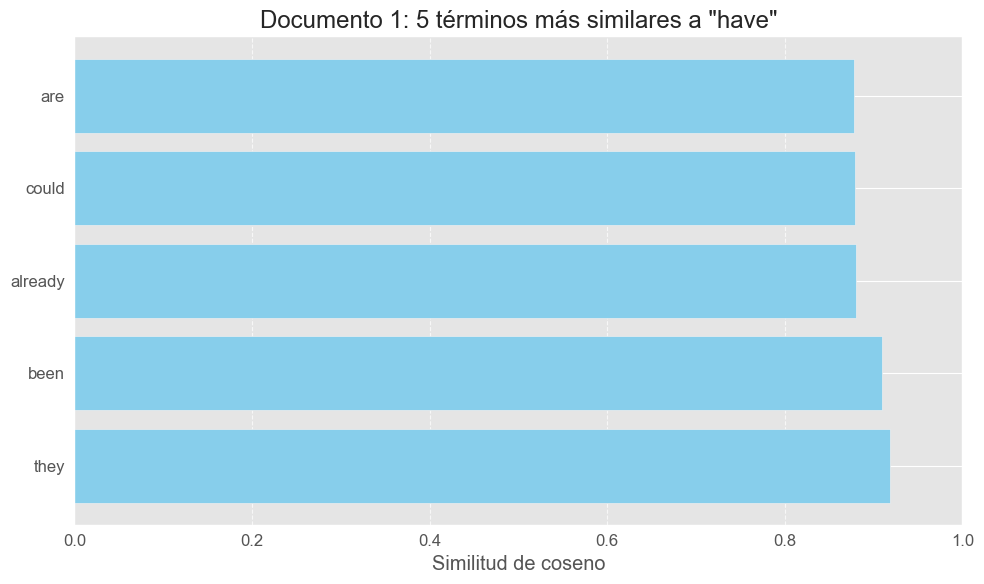

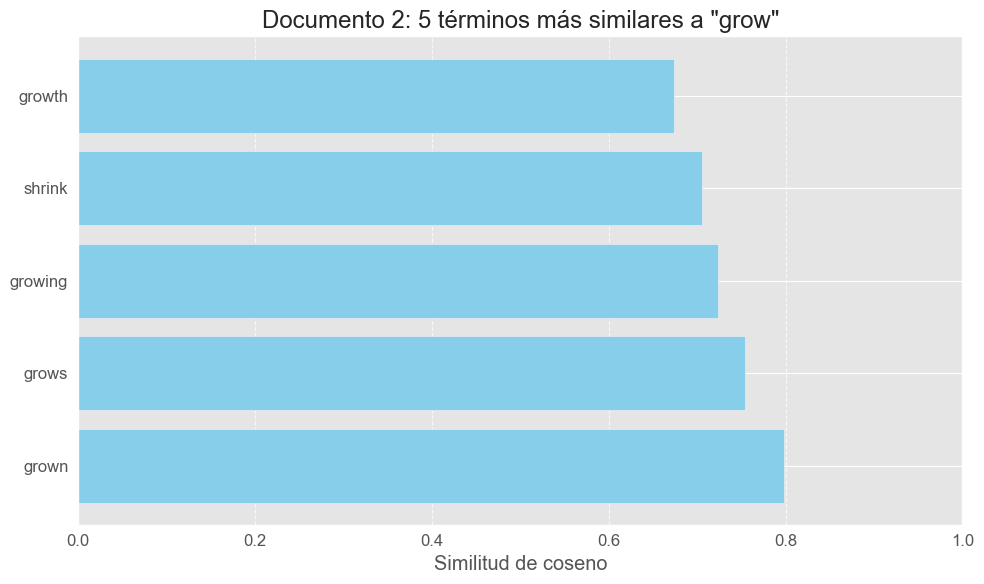

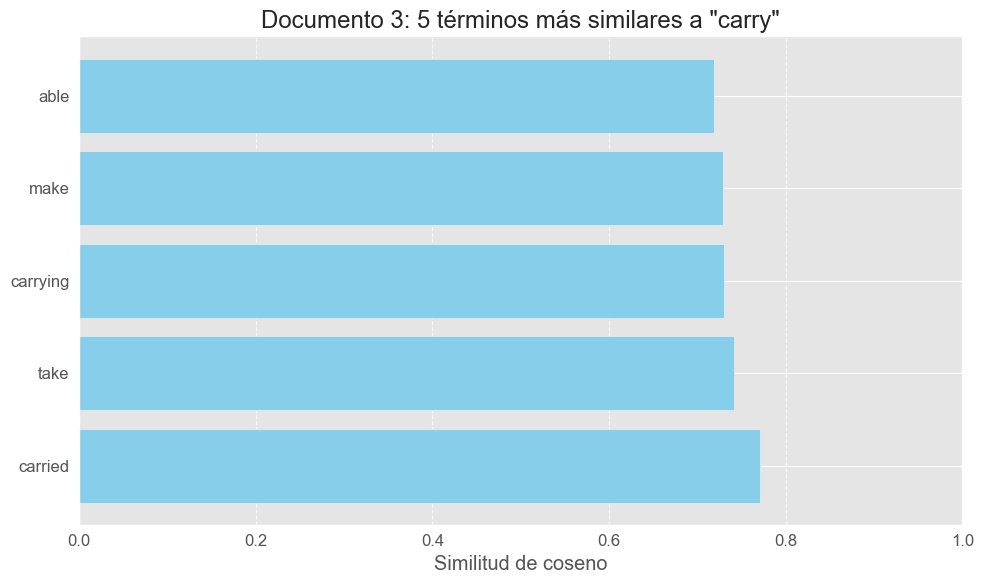

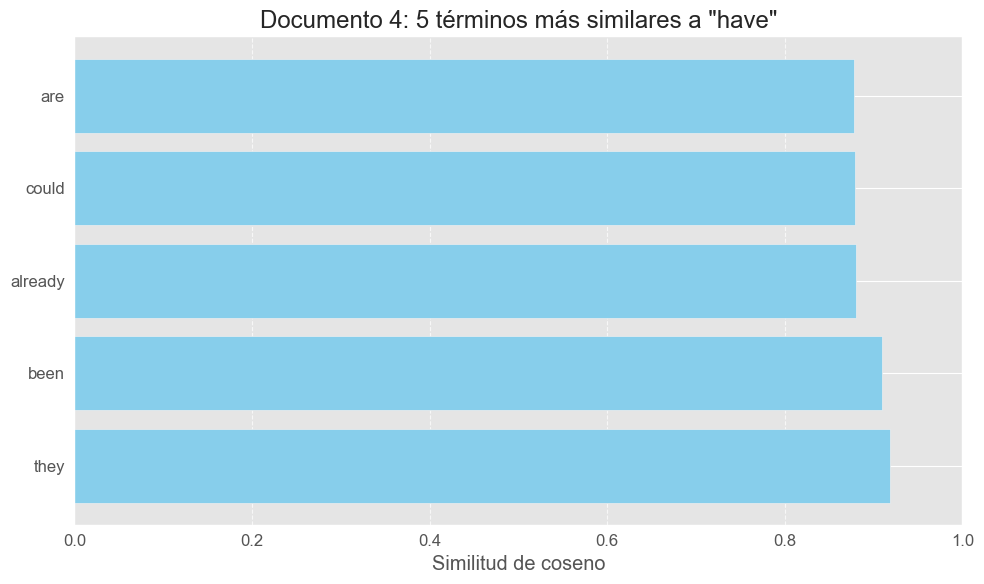

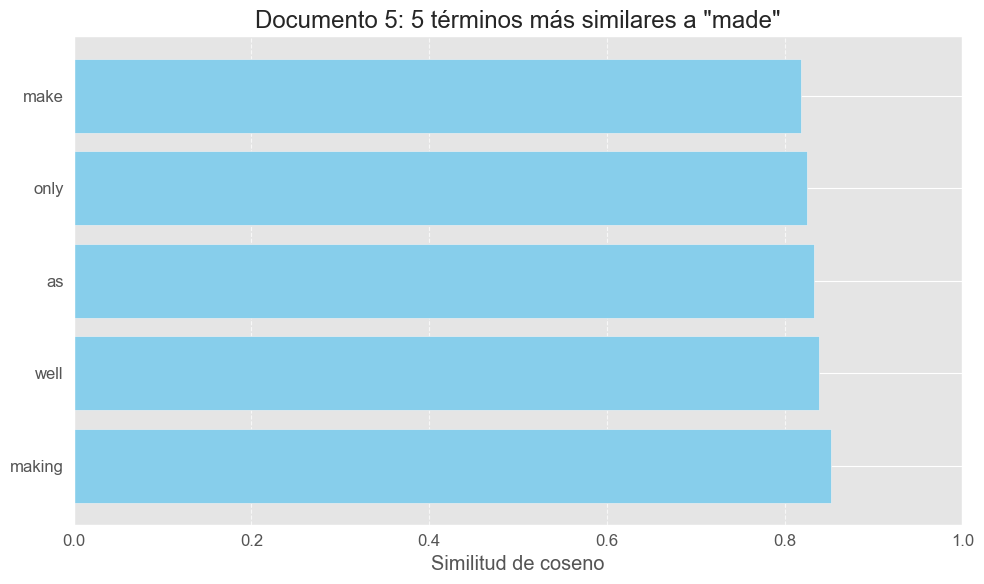

In [101]:
import matplotlib.pyplot as plt

# Configurar tamaño de fuente para mejor legibilidad
plt.rcParams.update({'font.size': 12})

# Visualización de resultados para cada documento
for i, verbo in enumerate(verbos_frecuentes):
    if verbo and verbo in glove_vectors:
        similares = encontrar_similares_glove(verbo, glove_vectors)
        
        if similares:
            # Crear gráfico de barras horizontales
            plt.figure(figsize=(10, 6))
            
            # Extraer palabras y similitudes
            palabras = [palabra for palabra, _ in similares]
            similitudes = [similitud for _, similitud in similares]
            
            # Crear barras horizontales (de abajo hacia arriba)
            plt.barh(range(len(palabras)), similitudes, align='center', color='skyblue')
            plt.yticks(range(len(palabras)), palabras)
            
            # Añadir etiquetas y título
            plt.xlabel('Similitud de coseno')
            plt.title(f'Documento {i+1}: 5 términos más similares a "{verbo}"')
            plt.xlim(0, 1)  # Escala de similitud de coseno: 0-1
            plt.grid(axis='x', linestyle='--', alpha=0.7)
            
            plt.tight_layout()
            plt.show()

## 6. Similitud de documentos con "embedding"

En esta sección, implementaremos la comparación de similitud entre documentos utilizando el modelo pre-entrenado BERT (Bidirectional Encoder Representations from Transformers). A diferencia del enfoque basado en synsets que usamos anteriormente, BERT captura el significado contextual completo de los documentos.

Utilizaremos específicamente el modelo "bert-base-uncased", que no hace distinción entre mayúsculas y minúsculas, para obtener embeddings de documentos y calcular su similitud mediante la similitud del coseno.

In [109]:
# Instalación de transformers (si no está instalado)
try:
    import transformers
except ImportError:
    !pip install transformers

# Verificamos si torch está instalado
try:
    import torch
except ImportError:
    !pip install torch

In [110]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import time

# Cargar modelo BERT pre-entrenado
print("Cargando modelo BERT 'bert-base-uncased'...")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Verificar si hay GPU disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Usando dispositivo: {device}")
model = model.to(device)

Cargando modelo BERT 'bert-base-uncased'...
Usando dispositivo: cpu


In [111]:
def obtener_embedding_bert(texto, max_length=512):
    """
    Obtiene el embedding de un documento usando BERT.

    Args:
        texto (str): Texto del documento
        max_length (int): Longitud máxima de tokens

    Returns:
        numpy.ndarray: Vector de embedding del documento
    """
    # Tokenizar el texto
    inputs = tokenizer(texto, return_tensors="pt", padding=True,
                      truncation=True, max_length=max_length)

    # Mover tensores al dispositivo
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Obtener embeddings
    with torch.no_grad():
        outputs = model(**inputs)

    # Usar el embedding del token [CLS] (primer token) como representación del documento
    # Este token captura la representación semántica del documento completo
    embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()

    return embedding

# Calcular los embeddings para cada documento en el corpus
embeddings_documentos = []
tiempos = []

print("Calculando embeddings BERT para cada documento...")
for i, doc in enumerate(cuerpo):
    inicio = time.time()
    print(f"Procesando documento {i+1}...")

    # Obtener embedding
    embedding = obtener_embedding_bert(doc)
    embeddings_documentos.append(embedding)

    fin = time.time()
    tiempo = fin - inicio
    tiempos.append(tiempo)
    print(f"  Tiempo: {tiempo:.2f} segundos")

Calculando embeddings BERT para cada documento...
Procesando documento 1...
  Tiempo: 0.95 segundos
Procesando documento 2...
  Tiempo: 0.29 segundos
Procesando documento 3...
  Tiempo: 0.25 segundos
Procesando documento 4...
  Tiempo: 0.27 segundos
Procesando documento 5...
  Tiempo: 0.23 segundos


In [112]:
# Calcular similitud del coseno entre todos los pares de documentos
print("\nSimilitud entre documentos usando embeddings BERT:")
print(f"{'-'*50}")

# Matriz para almacenar similitudes
num_docs = len(embeddings_documentos)
matriz_similitud = np.zeros((num_docs, num_docs))

for i in range(num_docs):
    for j in range(i, num_docs):
        # Calcular similitud del coseno
        sim = cosine_similarity(embeddings_documentos[i], embeddings_documentos[j])[0][0]
        matriz_similitud[i, j] = sim
        matriz_similitud[j, i] = sim  # La matriz es simétrica

        # Mostrar resultado solo para pares distintos (i != j)
        if i != j:
            print(f"Documento {i+1} ↔ Documento {j+1}: {sim:.4f}")


Similitud entre documentos usando embeddings BERT:
--------------------------------------------------
Documento 1 ↔ Documento 2: 0.8154
Documento 1 ↔ Documento 3: 0.8294
Documento 1 ↔ Documento 4: 0.8477
Documento 1 ↔ Documento 5: 0.7890
Documento 2 ↔ Documento 3: 0.7713
Documento 2 ↔ Documento 4: 0.8992
Documento 2 ↔ Documento 5: 0.8628
Documento 3 ↔ Documento 4: 0.8007
Documento 3 ↔ Documento 5: 0.7886
Documento 4 ↔ Documento 5: 0.9037


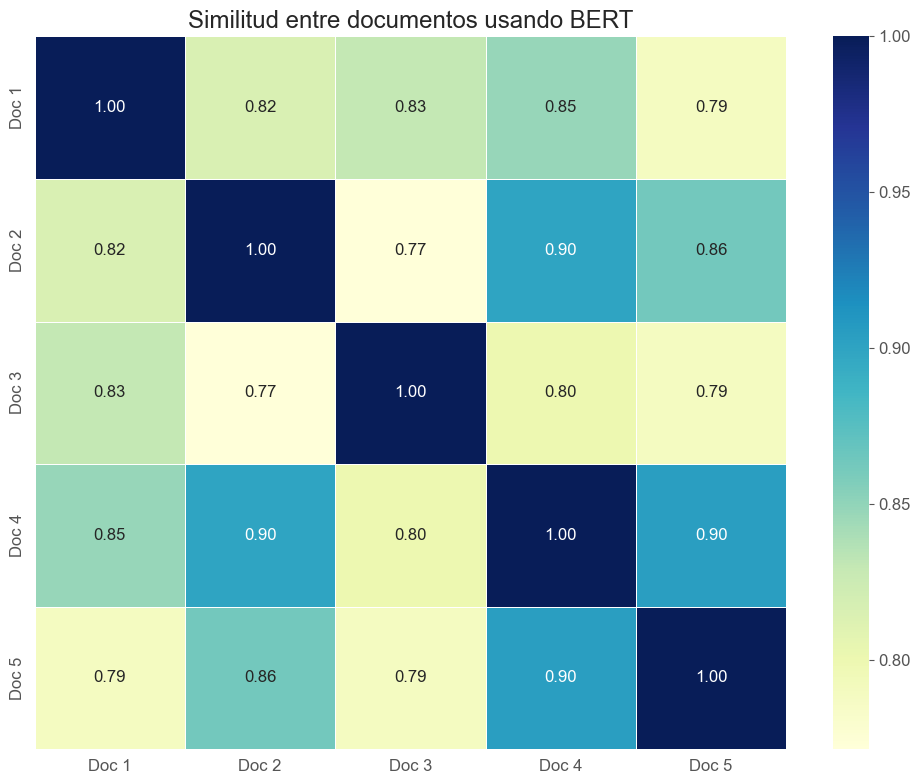

Documento base (1)

Ranking de similitud (BERT):
Documento 4: 0.8477
Documento 3: 0.8294
Documento 2: 0.8154
Documento 5: 0.7890


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear DataFrame para la matriz de similitud
df_similitud = pd.DataFrame(matriz_similitud)
df_similitud.index = [f'Doc {i+1}' for i in range(num_docs)]
df_similitud.columns = [f'Doc {i+1}' for i in range(num_docs)]

# Visualizar matriz de similitud como mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(df_similitud, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Similitud entre documentos usando BERT')
plt.tight_layout()
plt.show()

# Crear tabla de similitud para el documento base (el primero) con los demás
doc_base_idx = 0  # Documento base (el primero)
similitudes_bert = []

for i in range(num_docs):
    if i != doc_base_idx:
        similitudes_bert.append((i, matriz_similitud[doc_base_idx, i]))

# Ordenar por similitud
similitudes_bert.sort(key=lambda x: x[1], reverse=True)

print(f"Documento base ({doc_base_idx + 1})")
print("\nRanking de similitud (BERT):")
for i, sim in similitudes_bert:
    print(f"Documento {i+1}: {sim:.4f}")